In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from binary_decoders import lecroy
from pathlib import Path
import numpy as np
from importlib import reload

LeCroy Scope Data
Path: /home/etl/Test_Stand/daq/LecroyMount/C3--Trace112114.trc
Instrument: LECROYWaveRunner
Instrument Number: 21794
Template Name: LECROY_2_3 
Channel: 3
WaveArrayCount: 5010000
Vertical Coupling: DC50
Bandwidth Limit: off
Record Type: single_sweep
Processing: No Processing
TimeBase: 5 ns/div
TriggerTime: 2025-02-03 16:24:57.020
Minimum Vertical Value: -0.200008V
Maximunm Vertical Value: 1.393366V
Horizontal Interval: 0.0500 ns
Sample Rate: 20.0 Gigasamples per second 
Total Number of Events: 5000



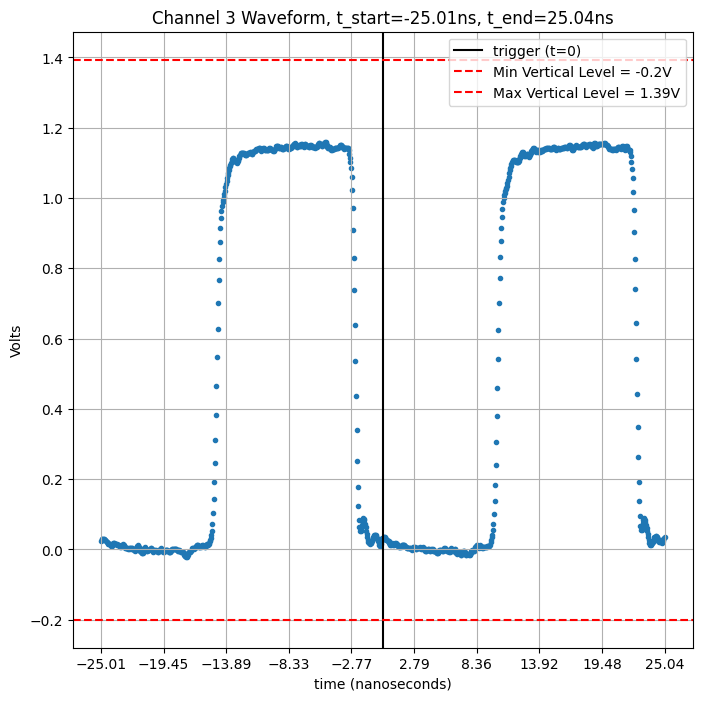

In [ ]:
# sudo mount -t cifs //192.168.0.6/Waveforms /home/etl/Test_Stand/daq/LecroyMount -o user=mothra,uid=etl,gid=etl,vers=2.0
reload(lecroy)
run = 112114
trace_file = lambda chnl, run: Path(f'/home/etl/Test_Stand/daq/LecroyMount/C{chnl}--Trace{run}.trc')
pulse = lecroy.LecroyReader(trace_file(chnl=3,run=run))
event = 5
pulse.plot_event(event)

In [29]:
import test_beam_config as TBConfig
import tomllib
from importlib import reload
reload(TBConfig)

class RunTB:
    def __init__(self, tb_config:TBConfig.Config):
        self.tb_config = tb_config

        self.run_number_path  = self.tb_config.project_directory / Path('daq/next_run_number.txt')
        self.etroc_ready_path = self.tb_config.project_directory / Path('daq/running_ETROC_acquisition.txt')
        self.scope_ready_path = self.tb_config.project_directory / Path('daq/running_acquisition.txt')

    @property
    def is_etroc_ready(self) -> bool:
        return self.get_status(self.etroc_ready_path)

    @is_etroc_ready.setter
    def is_etroc_ready(self, status: bool):
        self.is_etroc_ready = self.set_status(self.etroc_ready_path, is_ready=status)

    @property
    def is_scope_ready(self) -> bool:
        return self.get_status(self.scope_ready_path)

    @is_scope_ready.setter
    def is_scope_ready(self, status: bool):
        self.is_scope_ready = self.set_status(self.scope_ready_path, is_ready=status)

    def get_status(self, path: Path) -> bool:
        with open(path) as file:
            status = file.read().strip()
        return status == "True"

    def set_status(self, path: Path, is_ready: bool = True):
        with open(path, "w") as f:
            value = "True" if is_ready else "False"
            f.write(value)
            f.truncate()
        return value == "True"

    @property   
    def run_number(self):
        with open(self.run_number_path, 'r') as file:
            run_number = file.read().strip()
        return run_number
    
# Validate the Config File
with open('../test_beam.toml', 'rb') as f:
    data = tomllib.load(f)

print(data)
tb_run = TBConfig.Config.model_validate(data)


{'test_beam': {'name': 'DESY March 2025', 'beam_energy': 120, 'project_directory': '/home/etl/Test_Stand/ETL_TestingDAQ/'}, 'run_config': {'comment': 'Temperature -20C at new trigger threshold', 'kcu_ip_address': '192.168.0.10', 'kcu_firmware_version': 'abc123', 'num_events': 5000, 'num_runs': 200, 'etroc_binary_data_directory': '/home/etl/Test_Stand/ETL_TestingDAQ/Test_Beam_Data/DebugTB/etroc_binaries'}, 'telescope_setup': {'service_hybrids': [{'readout_board_name': 15, 'readout_board_version': '2.2', 'module_config_name': 'modulev1', 'modules': [[110], [], []], 'bias_voltage': 260, 'l1a_delay': 14, 'offset': 10, 'power_mode': 'i1', 'LV_psu': 'Siglent SPD3303X_E', 'HV_psu': 'CAEN HV Power Supply'}]}, 'oscilloscope': {'name': 'Teledyne LeCroy Waverunner 8104', 'binary_data_directory': '/home/etl/Test_Stand/daq/LecroyMount/', 'sample_rate': 20, 'horizontal_window': 50, 'mcp_channel': 'C2', 'clock_channel': 'C3', 'trigger': -0.3, 'v_scale_2': 0.2, 'v_scale_3': 0.2, 'v_position_2': 3, 'v_

In [31]:
tb_run.telescope_setup

TelescopeSetup(service_hybrids=[ServiceHybrid(readout_board_name=15, readout_board_version='2.2', module_config_name='modulev1', modules=[[110], [], []], LV_psu='Siglent SPD3303X_E', HV_psu='CAEN HV Power Supply', l1a_delay=14, offset=10, bias_voltage=260.0, power_mode='i1')])